Q-6. Imagine you have a dataset where you have predicted loan Eligibility using any 4 different classification algorithms. Now you have to build a model which can predict loan Eligibility and you need to find the accuracy of the model and built-in docker and use some library to display that in frontend Dataset This is the Dataset You can use this dataset for this question.

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [3]:
data=pd.read_csv("E:\DATA SETS\loan_data_set.csv")

In [4]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 614 entries, 0 to 613
Data columns (total 13 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Loan_ID            614 non-null    object 
 1   Gender             601 non-null    object 
 2   Married            611 non-null    object 
 3   Dependents         599 non-null    object 
 4   Education          614 non-null    object 
 5   Self_Employed      582 non-null    object 
 6   ApplicantIncome    614 non-null    int64  
 7   CoapplicantIncome  614 non-null    float64
 8   LoanAmount         592 non-null    float64
 9   Loan_Amount_Term   600 non-null    float64
 10  Credit_History     564 non-null    float64
 11  Property_Area      614 non-null    object 
 12  Loan_Status        614 non-null    object 
dtypes: float64(4), int64(1), object(8)
memory usage: 62.5+ KB


In [5]:
data.isnull().sum()

Loan_ID               0
Gender               13
Married               3
Dependents           15
Education             0
Self_Employed        32
ApplicantIncome       0
CoapplicantIncome     0
LoanAmount           22
Loan_Amount_Term     14
Credit_History       50
Property_Area         0
Loan_Status           0
dtype: int64

In [6]:
import statistics as st
data["Gender"] = data["Gender"].fillna(st.mode(data["Gender"]))
data["Married"] = data["Married"].fillna(st.mode(data["Married"]))
data["Self_Employed"] = data["Self_Employed"].fillna(st.mode(data["Self_Employed"]))

In [7]:
data["LoanAmount"] = data["LoanAmount"].fillna(np.nanmedian(data["LoanAmount"]))
data["Loan_Amount_Term"] = data["Loan_Amount_Term"].fillna(np.nanmedian(data["Loan_Amount_Term"]))
data["Credit_History"] = data["Credit_History"].fillna(np.nanmedian(data["Credit_History"]))

In [8]:
data.drop(["Loan_ID","Dependents"],axis=1,inplace=True)

In [9]:
catigorical_features = data.select_dtypes(include="object").columns
numerical_features = data.select_dtypes(exclude="object").columns
print(catigorical_features)
print(numerical_features)

Index(['Gender', 'Married', 'Education', 'Self_Employed', 'Property_Area',
       'Loan_Status'],
      dtype='object')
Index(['ApplicantIncome', 'CoapplicantIncome', 'LoanAmount',
       'Loan_Amount_Term', 'Credit_History'],
      dtype='object')


In [10]:
from sklearn.preprocessing import LabelEncoder
lable = LabelEncoder()

for i in catigorical_features:
    data[i] = lable.fit_transform(data[i])

<AxesSubplot:>

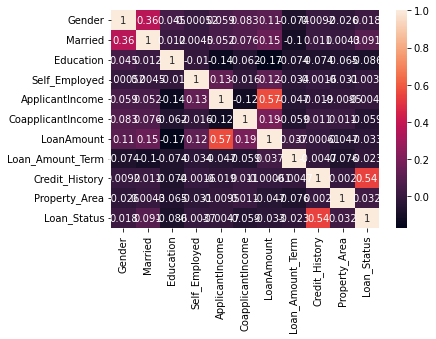

In [11]:
sns.heatmap(data.corr(),annot=True)

In [12]:
x = data.drop("Loan_Status",axis=1)
y = data["Loan_Status"]

In [13]:
catigorical_features = x.select_dtypes(include="object").columns
numerical_features = x.select_dtypes(exclude="object").columns
print(catigorical_features)
print(numerical_features)

Index([], dtype='object')
Index(['Gender', 'Married', 'Education', 'Self_Employed', 'ApplicantIncome',
       'CoapplicantIncome', 'LoanAmount', 'Loan_Amount_Term', 'Credit_History',
       'Property_Area'],
      dtype='object')


In [15]:
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import Pipeline
from sklearn.compose import ColumnTransformer

In [16]:
num_pipline = Pipeline(
    steps=[
        ("imputer",SimpleImputer(strategy="median")),
        ("scaler",StandardScaler())
    ]
)

cato_pipline = Pipeline(
    steps=[
        ("imputer",SimpleImputer(strategy="most_frequent")),
        ("scaler",StandardScaler())
    ]
)

# Create Preprocessor object
preprocessor = ColumnTransformer([
    ("num_pipline",num_pipline,numerical_features),
    ("cato_pipline",cato_pipline,catigorical_features)
])

In [18]:
from sklearn.model_selection import train_test_split

In [19]:
X_train,X_test,y_train,y_test = train_test_split(x,y,test_size=0.20,random_state=42)

In [20]:
from sklearn.linear_model import LogisticRegression

In [21]:
logestic = LogisticRegression(class_weight="balanced",C=10)
logestic.fit(X_train,y_train)

LogisticRegression(C=10, class_weight='balanced')

In [22]:
logestic.score(X_train,y_train)

0.790224032586558

In [23]:
y_pred = logestic.predict(X_test)

In [28]:
from sklearn.metrics import accuracy_score,classification_report

In [29]:
accuracy_score(y_test,y_pred)

0.7723577235772358

In [30]:
print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

           0       0.80      0.47      0.59        43
           1       0.77      0.94      0.84        80

    accuracy                           0.77       123
   macro avg       0.78      0.70      0.72       123
weighted avg       0.78      0.77      0.75       123



In [34]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import BaggingClassifier

In [35]:
# Bagging using tree
tree = DecisionTreeClassifier()
bagging = BaggingClassifier(tree,n_estimators=50,max_samples=8)
bagging.fit(X_train,y_train)

BaggingClassifier(estimator=DecisionTreeClassifier(), max_samples=8,
                  n_estimators=50)

In [36]:
bagging.score(X_train,y_train)

0.7576374745417516

In [37]:

y_pred = bagging.predict(X_test)

In [38]:
accuracy_score(y_test,y_pred)

0.7154471544715447

In [39]:
from sklearn.ensemble import AdaBoostClassifier
adaboost = AdaBoostClassifier(n_estimators=150,learning_rate=0.1)
adaboost.fit(X_train,y_train)

AdaBoostClassifier(learning_rate=0.1, n_estimators=150)

In [40]:
adaboost.score(X_train,y_train)

0.8289205702647657

In [41]:
y_pred = adaboost.predict(X_test)

In [42]:

accuracy_score(y_test,y_pred)

0.7967479674796748

In [43]:
print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

           0       1.00      0.42      0.59        43
           1       0.76      1.00      0.86        80

    accuracy                           0.80       123
   macro avg       0.88      0.71      0.73       123
weighted avg       0.85      0.80      0.77       123



In [45]:
from sklearn.ensemble import RandomForestClassifier

In [46]:
#Randomforest
forest = RandomForestClassifier(n_estimators=120,max_depth=8,class_weight="balanced",max_samples=2,max_leaf_nodes=3)
forest.fit(X_train,y_train)

RandomForestClassifier(class_weight='balanced', max_depth=8, max_leaf_nodes=3,
                       max_samples=2, n_estimators=120)

In [47]:
forest.score(X_train,y_train)

0.6965376782077393

In [48]:
y_pred = forest.predict(X_test)

In [49]:
accuracy_score(y_test,y_pred)

0.6504065040650406

In [50]:
print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

           0       0.00      0.00      0.00        43
           1       0.65      1.00      0.79        80

    accuracy                           0.65       123
   macro avg       0.33      0.50      0.39       123
weighted avg       0.42      0.65      0.51       123



c:\Users\KHUSHBOO PERWEEN\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
c:\Users\KHUSHBOO PERWEEN\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
c:\Users\KHUSHBOO PERWEEN\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
